# 🔥포스🔥

### 위 게시글을 시리즈물📖입니다.  
**[1편. OpenCV의 기초, Numpy와 Matplotlib](https://dacon.io/codeshare/4768?page=1&dtype=recent)**<br>
**[2편. OpenCV 기초(이미지 입출력, 그리기, 창 관리, 이벤트 처리 등)](https://dacon.io/codeshare/4837?page=1&dtype=recent)**<br>
**[3편. 이미지 프로세싱(컬러 스페이스, 스레시홀딩, 이미지 연산, 히스토그램)](https://dacon.io/codeshare/4858?page=1&dtype=recent)**<br>
**[4편. OpenCV 기하학적 변환](https://dacon.io/codeshare/4875?page=1&dtype=recent)**<br>
**[5편. OpenCV 영상필터](https://dacon.io/codeshare/4898?page=1&dtype=recent)**<br>
**[6편. Multi-Hand Gesture Recognition(1)](https://dacon.io/codeshare/4956?page=1&dtype=recent)**

* 안녕하세요 :) 데이크루 2기 *포스팀*입니다!
* 오늘은!! 포스팀이 만든 **프로젝트**를 발표하는 게시글입니다!
* 저번에 게시했던 Multi-Hand Gesture Recognition에 모형에 이어 모형을 활용하여 다양한 정규화 방식을 진행하여 어떤 정규화 방식이 화면 중앙이 아니더라도 손 동작을 잘 인식하는지 알아봅시다!



## 목차
## 1. 코드
###  1.1 벡터 정규화
###  1.2 위치 정규화
## 2. 결론

# 그럼 시작합니다 :)


### 개요

코로나로 인해 비대면으로 진행되는 업무가 많이 생겼습니다. 가령 수업, 미팅 등 입니다. 이렇게 비대면 수요가 높아지다보니 영상에서 어떤 task를 이용한 사업들도 많이 나왔습니다. 최근 기사에서는 '비대면 술자리' 라는 콘텐츠로 화면에서 물체를 분류하거나 처리하여 게임에 적용하는 등 많은 사례가 나오고 있습니다. 이에, 동작을 인식하는 프로젝트를 하면서 실제 현업에서 적용된 사례를 간단하게나마 구현해보고 더 나아가 모든 비대면 업무 참가자들이 마이크나 채팅을 통해 대답하는 것보다 손 동작을 인식함으로써 효율적인 의사소통을 기대하는 마음으로 프로젝트를 진행하였습니다. 



### 데이터 소개


![image](https://user-images.githubusercontent.com/82289435/169697510-31c88ea0-7d03-4aa2-b644-072574c37050.png)



분류하고자 하는 손 동작 인식은 두 손을 이용한 동작 인식입니다. 사용한 동작은 총 4가지 입니다.

- yes : 두 손을 동그랗게 모아 o를 나타내는 동작입니다.
- no : 두 손을 cross하여 x를 나타내는 동작입니다.
- like : 두 손으로 엄지척을 하는 동작입니다.
- heart : 두 손으로 하트를 그리는 동작입니다.



### 모형 설명

Base Model로 딥러닝 중 **LSTM(Long Short Term Memory)**을 사용하였습니다. 장/단기 기억을 가능하게 설계한 신경망 구조를 의미하는 LSTM은 주로 시계열 처리나 자연어 처리에 많이 사용되곤 합니다. 여기에서는 동작의 움직임을 frame 당으로 바꾸어 vector로 만들어 input으로 들어갑니다. 저희는 많은 모형 중에 [6편. Multi-Hand Gesture Recognition](https://dacon.io/codeshare/4956?page=1&dtype=recent) 의 결론으로 냈던 LSTM 모형을 사용하여 모델링을 시도합니다.

### 1. 코드

- 저번 프로젝트 1편에서는 **과적합을 줄이기 위해** 여러 방법들을 사용해보았습니다.
- 이 때 해당 모형들을 가지고 test 데이터 셋으로 실험을 진행해보니 **중심에서는 인식을 잘 하지만 영상의 외곽으로 손동작이 갈수록 인식을 잘 못하는 경향이 나타났습니다.**
- 따라서 어떻게 하면 영상 외곽에서도 손동작을 잘 인식할 수 있을지를 고민해 보았고, 그 이유를 분석해보니 test 데이터는 **영상의 외곽에 손이 위치**했기 때문이라는 가설을 세워보았습니다.
- 그리하여 성능을 올릴 수 있는 방법으로 벡터 정규화와 위치 정규화 방법을 선택하였고, 따라서 이번 프로젝트 2편에서는 저번 프로젝트 1편에서 사용했던 과적합 방지 모델을 그대로 사용한 결과보다 벡터 정규화, 위치 정규화 방법이 더 좋은 F1-Score를 얻을 수 있을것이라는 가설을 검증해보도록 하겠습니다.

### 정규화 적용 전

![슬라이드2](https://user-images.githubusercontent.com/82289435/169698149-d3ebb2f6-8865-4a3d-9237-3da687eb2e64.PNG)

- 다음 그림과 같이 정규화를 적용하기 전에는 화면 해상도 전체에 대하여 좌표 계산을 진행하게 됩니다.

### 정규화 적용 후


![슬라이드3](https://user-images.githubusercontent.com/82289435/169698155-33aa81c6-9eda-4269-b3cf-01e86ce7f59d.PNG)


- 정규화를 적용하면 손을 기준으로 좌표 또는 벡터가 계산되어 좌표를 산출합니다.

### 1.1 정규화를 적용하지 않은 모델의 성능(Test Data Inference)

Working Directory 설정  
jupyter notebook의 경로를 **{User path}\Hand_Gesture_Recognition**로 지정해주세요.

In [1]:
%pwd
%cd ../../../

c:\Users\user\Desktop\Projects\Hand_Gesture_Recognition


라이브러리 선언 및 시드 고정

In [2]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

데이터 로드

In [3]:
# 정규화 적용하지 않은 학습 데이터
data_yes = np.load('dataset/not_applied_normalization/train/seq_yes.npy')
data_no = np.load('dataset/not_applied_normalization/train/seq_no.npy')
data_like = np.load('dataset/not_applied_normalization/train/seq_like.npy')
data_heart = np.load('dataset/not_applied_normalization/train/seq_heart.npy')

# 테스트 데이터
test_yes = np.load('dataset/not_applied_normalization/new_test/seq_yes.npy')
test_no = np.load('dataset/not_applied_normalization/new_test/seq_no.npy')
test_like = np.load('dataset/not_applied_normalization/new_test/seq_like.npy')
test_heart = np.load('dataset/not_applied_normalization/new_test/seq_heart.npy')

actions = ['yes', 'no', 'like', 'heart']

data = np.concatenate([data_yes ,data_no, data_like, data_heart], axis=0)
data_test = np.concatenate([test_yes ,test_no, test_like, test_heart], axis=0)

학습 및 정답 데이터 분리

In [4]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

x_data_test = data_test[:, :, :-1]
labels_test = data_test[:, 0, -1]

분류 문제 풀이를 위한 원핫 인코딩

In [5]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data_test = to_categorical(labels_test, num_classes=len(actions))

train dataset, validation dataset, test dataset 구축

In [6]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_data_test = x_data_test.astype(np.float32)
y_data_test = y_data_test.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_data_test.shape, y_data_test.shape)

(3276, 10, 114) (3276, 4)
(364, 10, 114) (364, 4)
(3933, 10, 114) (3933, 4)


Custom F1score 함수 선언

In [7]:
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score

####  Modeling
- 지난 1편에서 최종 모델로 선정한 모델 사용

In [8]:
#기본 모델 + ㅣ2 규제 + dropout 30% + early stopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(len(actions), activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', metric_F1score])

#### Training
- 지난 1편에서의 학습 기법 적용

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_metric_F1score', min_delta = 0, patience = 20, mode = 'auto')


history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/not_applied_normalization_classifier.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_metric_F1score', factor=0.5, patience=50, verbose=1, mode='auto'),
        early_stopping
    
    ]
)

Epoch 1/50
103/103 [==============================] - 4s 22ms/step - loss: 40.5181 - acc: 0.3478 - metric_F1score: 0.3476 - val_loss: 2.6260 - val_acc: 0.8352 - val_metric_F1score: 0.8438

Epoch 00001: val_acc improved from -inf to 0.83516, saving model to models\not_applied_normalization_classifier.h5
Epoch 2/50
103/103 [==============================] - 1s 8ms/step - loss: 4.8987 - acc: 0.6728 - metric_F1score: 0.6724 - val_loss: 2.0194 - val_acc: 0.9066 - val_metric_F1score: 0.9112

Epoch 00002: val_acc improved from 0.83516 to 0.90659, saving model to models\not_applied_normalization_classifier.h5
Epoch 3/50
103/103 [==============================] - 1s 9ms/step - loss: 2.7818 - acc: 0.7788 - metric_F1score: 0.7789 - val_loss: 1.7227 - val_acc: 0.9341 - val_metric_F1score: 0.9361

Epoch 00003: val_acc improved from 0.90659 to 0.93407, saving model to models\not_applied_normalization_classifier.h5
Epoch 4/50
103/103 [==============================] - 1s 8ms/step - loss: 2.2871 - acc

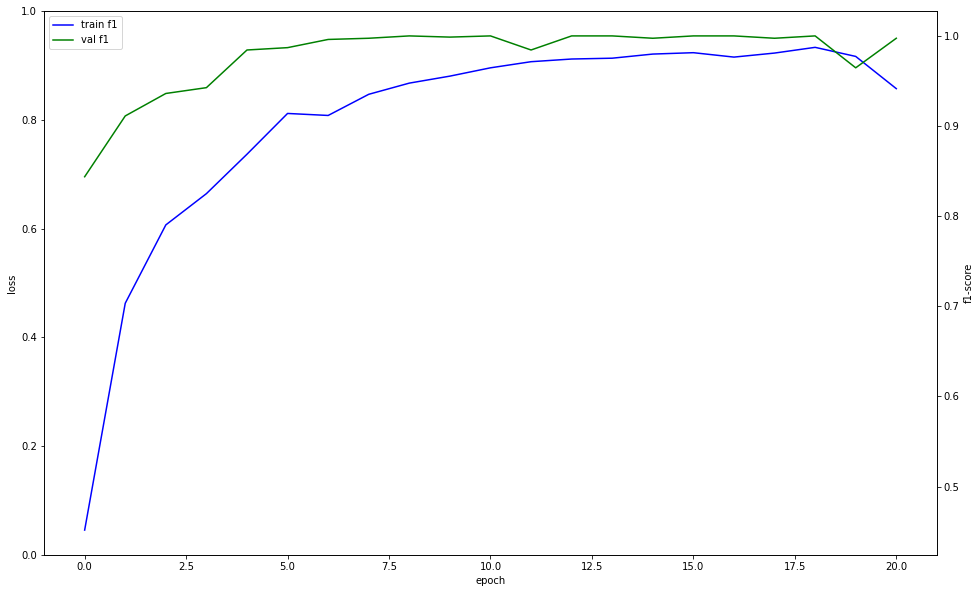

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['metric_F1score'], 'b', label='train f1')
acc_ax.plot(history.history['val_metric_F1score'], 'g', label='val f1')
acc_ax.set_ylabel('f1-score')
acc_ax.legend(loc='upper left')

plt.show()

validation dataset에 대한 confusion maxtrix를 활용한 성능 분석

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/not_applied_normalization_classifier.h5', custom_objects = {'metric_F1score':metric_F1score})

y_pred = model.predict(x_val)
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[277,   0],
        [  0,  87]],

       [[288,   0],
        [  0,  76]],

       [[262,   0],
        [  0, 102]],

       [[265,   0],
        [  0,  99]]], dtype=int64)

validation dataset에 대한 f1-score 계산

In [12]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        76
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00        99

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



#### test data

In [13]:
pred = model.predict(x_data_test)

In [14]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(np.argmax(y_data_test, axis=1), np.argmax(pred, axis=1))

array([[[2904,    8],
        [  35,  986]],

       [[3205,   35],
        [   3,  690]],

       [[2821,   19],
        [  63, 1030]],

       [[2747,   60],
        [  21, 1105]]], dtype=int64)

In [15]:
print(classification_report(np.argmax(y_data_test, axis=1), np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1021
           1       0.95      1.00      0.97       693
           2       0.98      0.94      0.96      1093
           3       0.95      0.98      0.96      1126

    accuracy                           0.97      3933
   macro avg       0.97      0.97      0.97      3933
weighted avg       0.97      0.97      0.97      3933



과적합 방지를 위해 L2 규제 + dropout 30% + early stopping 만을 사용한 결과 이를 예측한 f1-score는 0.97 ~ 1 정도가 나온것을 확인할 수 있습니다. 하지만 정규화를 적용하지 않더라도 위치가 달라지는 테스트 데이터에 대해 모델이 민감하게 반응하지 않아 모델의 자체 성능이 높게 나타난다는 점을 알 수 있습니다.

### 1.2 벡터 정규화

- 벡터 정규화란 한 벡터를 벡터의 길이로 나누어서 그 벡터의 길이를 1로 만드는 것을 말합니다.
- 이렇게 길이가 1이 된 벡터를 단위 벡터라고 부르고, 이러한 정규화 방식은 주로 키보드로 조작하는 게임에 자주 사용됩니다.
- (1,0) 벡터와 (0,1) 벡터가 합쳐졌을 때 (1,1) 벡터의 길이가 $\sqrt{2}$로 1보다 더 크기 때문에 이를 정규화를 통해 이 길이를 1로 맞춰주어야 하기 때문입니다.
- 속력과 방향을 정의되는 벡터에서 순수하게 방향만을 남겨서 사용하고자 할 때 위와 같은 벡터 정규화 개념을 사용합니다.

- 벡터 정규화를 하는 방법은 각 성분 v = (x, y)에 벡터의 길이를 나누는 것입니다.
- 예를 들어 벡터 v의 각 성분 x,y 가 1,2,3 이라면 ||v|| = $\sqrt{1^2+2^2+3^2} = \sqrt{14}$가 되고 이 벡터의 길이로 각 성분을 나누면 $(\frac{1}{\sqrt{14}}, \frac{2}{\sqrt{14}}, \frac{3}{\sqrt{14}})$이 됩니다.

벡터 정규화 데이터 전처리 코드

In [14]:
# vector normalization
def Vector_Normalization(joint):
    # Compute angles between joints
    v1 = joint[[0,1,2,3,0,5,6,7,0,9,10,11,0,13,14,15,0,17,18,19] + [i+21 for i in [0,1,2,3,0,5,6,7,0,9,10,11,0,13,14,15,0,17,18,19]], :2] # Parent joint
    v2 = joint[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] + [i+21 for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]], :2] # Child joint
    v = v2 - v1 
    # Normalize v
    v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

    # Get angle using arcos of dot product
    angle = np.arccos(np.einsum('nt,nt->n',
        v[[0,1,2,4,5,6,8,9,10,12,13,14,16,17,18] + [i+20 for i in [0,1,2,4,5,6,8,9,10,12,13,14,16,17,18]] ,:], 
        v[[1,2,3,5,6,7,9,10,11,13,14,15,17,18,19] + [i+20 for i in [1,2,3,5,6,7,9,10,11,13,14,15,17,18,19]],:])) 

    angle = np.degrees(angle) # Convert radian to degree

    angle_label = np.array([angle], dtype=np.float32)

    return v, angle_label

---

In [16]:
data_yes = np.load('dataset/vector_normalization/train/seq_yes.npy')
data_no = np.load('dataset/vector_normalization/train/seq_no.npy')
data_like = np.load('dataset/vector_normalization/train/seq_like.npy')
data_heart = np.load('dataset/vector_normalization/train/seq_heart.npy')

test_yes = np.load('dataset/vector_normalization/new_test/seq_yes.npy')
test_no = np.load('dataset/vector_normalization/new_test/seq_no.npy')
test_like = np.load('dataset/vector_normalization/new_test/seq_like.npy')
test_heart = np.load('dataset/vector_normalization/new_test/seq_heart.npy')

actions = ['yes', 'no', 'like', 'heart']

data = np.concatenate([data_yes ,data_no, data_like, data_heart], axis=0)
data_test = np.concatenate([test_yes ,test_no, test_like, test_heart], axis=0)

#### 데이터 x, y 나누기

In [17]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

x_data_test = data_test[:, :, :-1]
labels_test = data_test[:, 0, -1]

In [18]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data_test = to_categorical(labels_test, num_classes=len(actions))

#### X,y train_test_split

In [19]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_data_test = x_data_test.astype(np.float32)
y_data_test = y_data_test.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

####  Modeling

In [20]:
#기본 모델 + ㅣ2 규제 + dropout 30% + early stopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

model2 = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(len(actions), activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01))
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', metric_F1score])

#### Training

In [21]:
early_stopping = EarlyStopping(monitor = 'val_metric_F1score', min_delta = 0, patience = 20, mode = 'auto')


history2 = model2.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/vector_normalization_classifier.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_metric_F1score', factor=0.5, patience=50, verbose=1, mode='auto'),
        early_stopping
    
    ]
)

Epoch 1/50
103/103 [==============================] - 3s 12ms/step - loss: 17.3250 - acc: 0.4184 - metric_F1score: 0.3703 - val_loss: 2.3508 - val_acc: 0.8709 - val_metric_F1score: 0.7406

Epoch 00001: val_acc improved from -inf to 0.87088, saving model to models\vector_normalization_classifier.h5
Epoch 2/50
103/103 [==============================] - 1s 9ms/step - loss: 3.3253 - acc: 0.7143 - metric_F1score: 0.5904 - val_loss: 1.7433 - val_acc: 0.9148 - val_metric_F1score: 0.7735

Epoch 00002: val_acc improved from 0.87088 to 0.91484, saving model to models\vector_normalization_classifier.h5
Epoch 3/50
103/103 [==============================] - 1s 8ms/step - loss: 2.2489 - acc: 0.8015 - metric_F1score: 0.6737 - val_loss: 1.3837 - val_acc: 0.9643 - val_metric_F1score: 0.9002

Epoch 00003: val_acc improved from 0.91484 to 0.96429, saving model to models\vector_normalization_classifier.h5
Epoch 4/50
103/103 [==============================] - 1s 9ms/step - loss: 1.7672 - acc: 0.8865 - metr

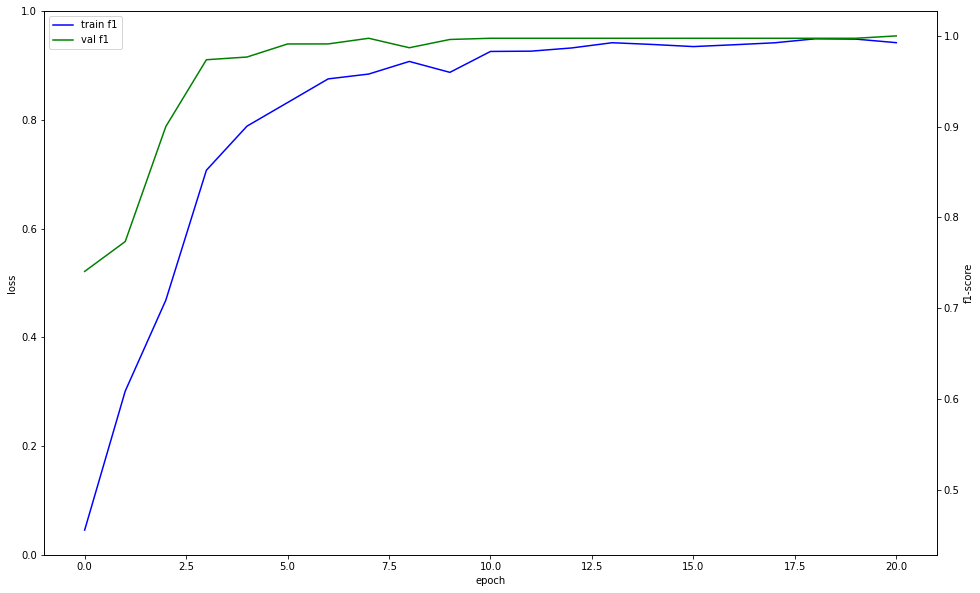

In [22]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history2.history['metric_F1score'], 'b', label='train f1')
acc_ax.plot(history2.history['val_metric_F1score'], 'g', label='val f1')
acc_ax.set_ylabel('f1-score')
acc_ax.legend(loc='upper left')

plt.show()

In [23]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model2 = load_model('models/vector_normalization_classifier.h5', custom_objects = {'metric_F1score':metric_F1score})

In [24]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

y_pred2 = model2.predict(x_val)
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred2, axis=1))

array([[[277,   0],
        [  0,  87]],

       [[288,   0],
        [  0,  76]],

       [[262,   0],
        [  0, 102]],

       [[265,   0],
        [  0,  99]]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_val, axis=1), np.argmax(y_pred2, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        76
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00        99

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



#### test data

In [26]:
pred2 = model2.predict(x_data_test)

In [27]:
multilabel_confusion_matrix(np.argmax(y_data_test, axis=1), np.argmax(pred2, axis=1))

array([[[2912,    0],
        [   1, 1020]],

       [[3240,    0],
        [   0,  693]],

       [[2839,    1],
        [  35, 1058]],

       [[2772,   35],
        [   0, 1126]]], dtype=int64)

In [28]:
print(classification_report(np.argmax(y_data_test, axis=1), np.argmax(pred2, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1021
           1       1.00      1.00      1.00       693
           2       1.00      0.97      0.98      1093
           3       0.97      1.00      0.98      1126

    accuracy                           0.99      3933
   macro avg       0.99      0.99      0.99      3933
weighted avg       0.99      0.99      0.99      3933



벡터 정규화를 사용하니 f1-score가 0.98 ~ 0.99로 편차가 조금 더 줄어든 모습입니다. 

### 1.3 위치 정규화 

- 위치 정규화란 화면 전체를 기준으로 표현된 좌표를 손 좌표 기준으로 변경하는 것을 말합니다.
- 이렇게 화면 어떤 곳에 손이 위치하여도 정규화된 데이터를 얻을 수 있습니다.
- 손목 좌표인 0번 좌표를 기준으로 좌표값의 차이를 리스트에 저장합니다.
- 좌표값의 차이를 min-max scale을 적용하여 -1 ~ 1사이 값으로 정규화합니다.
- 데이터에 음수가 나오는 이유는 좌표값의 차이에 따라 음수가 발생하며 방향 정보를 표현하게 됩니다.


위치 정규화 데이터 전처리 코드

In [28]:
# coordinate normalization(min-max scale)
def Coordinate_Normalization(joint):
    x_coordinates = []
    y_coordinates = []
    for i in range(21):
        x_coordinates.append(joint[i][0] - joint[0][0])
        y_coordinates.append(joint[i][1] - joint[0][1])
    for i in range(21):
        x_coordinates.append(joint[i+21][0] - joint[21][0])
        y_coordinates.append(joint[i+21][1] - joint[21][1])

    x_left_hand = x_coordinates[:21]
    x_right_hand = x_coordinates[21:]
    y_left_hand = y_coordinates[:21]
    y_right_hand = y_coordinates[21:]

    if max(x_left_hand) == min(x_left_hand):
        x_left_hand_scale = x_left_hand
    else:
        x_left_hand_scale = x_left_hand/(max(x_left_hand)-min(x_left_hand))
    
    if max(x_right_hand) == min(x_right_hand):
        x_right_hand_scale = x_right_hand
    else:
        x_right_hand_scale = x_right_hand/(max(x_right_hand)-min(x_right_hand))
    
    if max(y_left_hand) == min(y_left_hand):
        y_left_hand_scale = y_left_hand
    else:
        y_left_hand_scale = y_left_hand/(max(y_left_hand)-min(y_left_hand))
    
    if max(y_right_hand) == min(y_right_hand):
        y_right_hand_scale = y_right_hand
    else:
        y_right_hand_scale = y_right_hand/(max(y_right_hand)-min(y_right_hand))
            
    full_scale = np.concatenate([x_left_hand_scale.flatten(),
                                    x_right_hand_scale.flatten(),
                                    y_left_hand_scale.flatten(),
                                    y_right_hand_scale.flatten()])
    return full_scale

In [30]:
data_yes = np.load('dataset/cooridinate_normalization/train/seq_yes.npy')
data_no = np.load('dataset/cooridinate_normalization/train/seq_no.npy')
data_like = np.load('dataset/cooridinate_normalization/train/seq_like.npy')
data_heart = np.load('dataset/cooridinate_normalization/train/seq_heart.npy')

test_yes = np.load('dataset/cooridinate_normalization/new_test/seq_yes.npy')
test_no = np.load('dataset/cooridinate_normalization/new_test/seq_no.npy')
test_like = np.load('dataset/cooridinate_normalization/new_test/seq_like.npy')
test_heart = np.load('dataset/cooridinate_normalization/new_test/seq_heart.npy')

actions = ['yes', 'no', 'like', 'heart']

data = np.concatenate([data_yes ,data_no, data_like, data_heart], axis=0)
data_test = np.concatenate([test_yes ,test_no, test_like, test_heart], axis=0)

#### 데이터 x, y 나누기

In [32]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

x_data_test = data_test[:, :, :-1]
labels_test = data_test[:, 0, -1]

In [33]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data_te = to_categorical(labels_test, num_classes=len(actions))

#### X,y train_test_split

In [34]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_data_test = x_data_test.astype(np.float32)
y_data_test = y_data_test.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

####  Modeling

In [36]:
#기본 모델 + ㅣ2 규제 + dropout 30% + early stopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

model3 = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(len(actions), activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01))
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', metric_F1score])

#### Training

In [37]:
early_stopping = EarlyStopping(monitor = 'val_metric_F1score', min_delta = 0, patience = 20, mode = 'auto')


history3 = model3.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/cooridinate_normalization_classifier.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_metric_F1score', factor=0.5, patience=50, verbose=1, mode='auto'),
        early_stopping
    
    ]
)

Epoch 1/50
103/103 [==============================] - 3s 12ms/step - loss: 47.2489 - acc: 0.3649 - metric_F1score: 0.3636 - val_loss: 1.9386 - val_acc: 0.9231 - val_metric_F1score: 0.9269

Epoch 00001: val_acc improved from -inf to 0.92308, saving model to models\cooridinate_normalization_classifier.h5
Epoch 2/50
103/103 [==============================] - 1s 8ms/step - loss: 4.3795 - acc: 0.7307 - metric_F1score: 0.7309 - val_loss: 1.5707 - val_acc: 0.9423 - val_metric_F1score: 0.9426

Epoch 00002: val_acc improved from 0.92308 to 0.94231, saving model to models\cooridinate_normalization_classifier.h5
Epoch 3/50
103/103 [==============================] - 1s 9ms/step - loss: 2.9554 - acc: 0.8142 - metric_F1score: 0.8128 - val_loss: 1.2148 - val_acc: 0.9808 - val_metric_F1score: 0.9818

Epoch 00003: val_acc improved from 0.94231 to 0.98077, saving model to models\cooridinate_normalization_classifier.h5
Epoch 4/50
103/103 [==============================] - 1s 7ms/step - loss: 1.8038 - acc

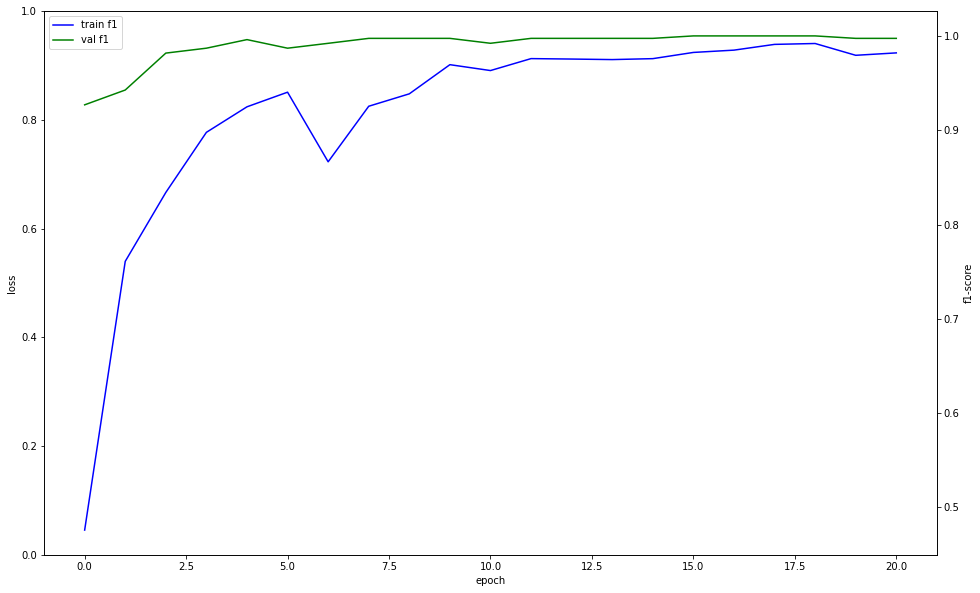

In [38]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history3.history['metric_F1score'], 'b', label='train f1')
acc_ax.plot(history3.history['val_metric_F1score'], 'g', label='val f1')
acc_ax.set_ylabel('f1-score')
acc_ax.legend(loc='upper left')

plt.show()

In [39]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model3 = load_model('models/cooridinate_normalization_classifier.h5', custom_objects = {'metric_F1score':metric_F1score})

In [40]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

y_pred3 = model3.predict(x_val)
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred3, axis=1))

array([[[277,   0],
        [  0,  87]],

       [[288,   0],
        [  0,  76]],

       [[262,   0],
        [  0, 102]],

       [[265,   0],
        [  0,  99]]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_val, axis=1), np.argmax(y_pred3, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        76
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00        99

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



#### test data

In [42]:
pred3 = model.predict(x_data_test)

In [43]:
multilabel_confusion_matrix(np.argmax(y_data_te, axis=1), np.argmax(pred3, axis=1))

array([[[2862,   50],
        [   2, 1019]],

       [[3240,    0],
        [  85,  608]],

       [[2791,   49],
        [  59, 1034]],

       [[2736,   71],
        [  24, 1102]]], dtype=int64)

In [44]:
print(classification_report(np.argmax(y_data_te, axis=1), np.argmax(pred3, axis=1)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1021
           1       1.00      0.88      0.93       693
           2       0.95      0.95      0.95      1093
           3       0.94      0.98      0.96      1126

    accuracy                           0.96      3933
   macro avg       0.96      0.95      0.95      3933
weighted avg       0.96      0.96      0.96      3933



위치 정규화는 오히려 성능이 저하되는 것을 확인할 수 있었습니다.

### 2. 결론

![image](https://user-images.githubusercontent.com/82289435/169701385-e2a0407c-bcee-48d2-9714-086045860054.png)

- 위 사진은 test 데이터셋인데 사진을 보시다싶이 손의 위치가 화면에 외곽에 있어도 다음과 같이 동작을 잘 인식하는 것을 확인할 수 있습니다.
- 최종적으로 **벡터 정규화**를 활용하여 정규화를 하기로 결정하였습니다. 벡터 정규화로 데이터를 전처리하여 손이 외곽으로 치우친 테스트 데이터 셋에도 좋은 성능을 내는 모델을 제작할 수 있습니다.
- 데이터에 따라서 벡터 정규화가 더 좋을수도 있고 위치 정규화가 더 좋을 수도 있으니, 여러분만의 커스텀 데이터를 제작하여 한 번 실습해보시길 바랍니다. :)
- 실습 코드 : https://github.com/updaun/HandGestureRecognition


### [마무리]
- 5월 31일 오후 2시에 OpenCV 나머지 후속편들을 들고 오겠습니다~
- **5월 31일 오후 2시에 만나요 🔥✨**

# 감사합니다 :)